In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model


In [2]:
dataset={"del_p":[0.5,0.7,0.9,1.1,1.3,1.5],"q":[15,17,20,22,25,27]}
data=pd.DataFrame(dataset)
data

,del_p,q
0,0.5,15
1,0.7,17
2,0.9,20
3,1.1,22
4,1.3,25
5,1.5,27


In [3]:
data['p']=data['del_p']+1
data['p_avg']=(data['del_p']/2)+1
data['q_avg']=(data['q']*data['p'])/data['p_avg']
mu=0.018
L=3.13
A=2.75
data['k']=(mu*L*data['q_avg'])/(A*data['del_p'])
data['1/p_avg']=1/data['p_avg']

data

,del_p,q,p,p_avg,q_avg,k,1/p_avg
0,0.5,15,1.5,1.25,18.000000,0.737542,0.800000
1,0.7,17,1.7,1.35,21.407407,0.626542,0.740741
2,0.9,20,1.9,1.45,26.206897,0.596564,0.689655
3,1.1,22,2.1,1.55,29.806452,0.555139,0.645161
4,1.3,25,2.3,1.65,34.848485,0.549193,0.606061
5,1.5,27,2.5,1.75,38.571429,0.526816,0.571429


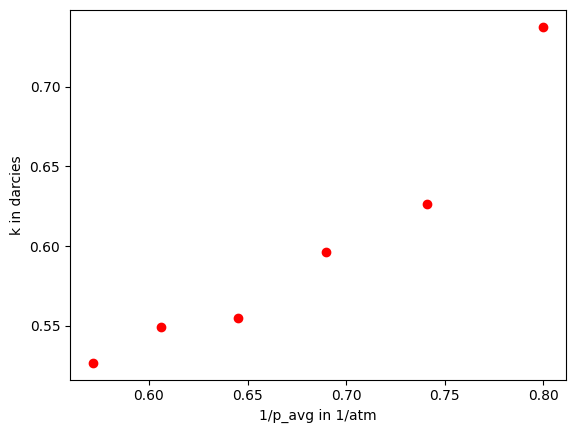

In [4]:
plt.xlabel('1/p_avg in 1/atm')
plt.ylabel('k in darcies')
plt.scatter(data[['1/p_avg']],data[['k']],marker='o',color='red')

**### Source Code For Simple Linear Regression Model**
**### For Calculating the Absolute Permeability of a core sample**
### Using the data obtained from Gas Permeameter

slope m is 0.8571689846478521;hence the klinkenberg factor b is 43.714661106205504 & absolute permeability k_abs is 19.60827244126051 millidarcies.


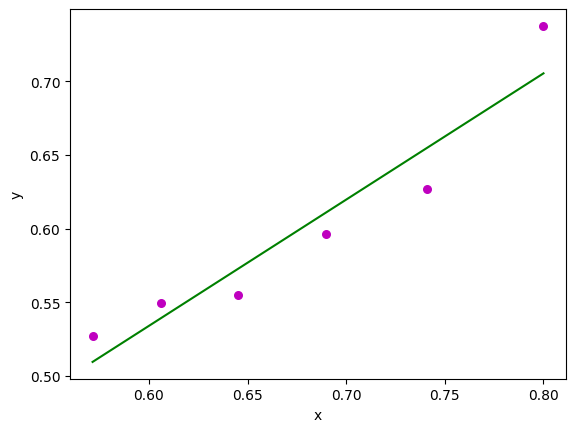

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def estimate_coef(x,y):
  n=np.size(x)
  m_x=np.mean(x)
  m_y=np.mean(y)

  SS_xy=np.sum(x*y)-n*m_x*m_y
  SS_xx=np.sum(x*x)-n*m_x*m_x

  m=SS_xy/SS_xx
  c=m_y-m*m_x

  return (m,c)

def plot_regression_line(x,y,b):
  plt.scatter(x, y, color = "m",marker = "o", s = 30)

  y_pred = b[1] + b[0]*x

  plt.plot(x, y_pred, color = "g")

  plt.xlabel('x')
  plt.ylabel('y')

  plt.show()

def main():
  x=np.array(data['1/p_avg'])
  y=np.array(data['k'])

  b=estimate_coef(x,y)

  print(f'slope m is {b[0]};hence the klinkenberg factor b is {b[0]/b[1]} & absolute permeability k_abs is {b[1]*1000} millidarcies.')

  plot_regression_line(x, y, b)

if __name__ == "__main__":
    main()

**### Istead of writing such a vast source code, we can simply import linear regression model from sklearn library and use directly.**

In [6]:
data

,del_p,q,p,p_avg,q_avg,k,1/p_avg
0,0.5,15,1.5,1.25,18.000000,0.737542,0.800000
1,0.7,17,1.7,1.35,21.407407,0.626542,0.740741
2,0.9,20,1.9,1.45,26.206897,0.596564,0.689655
3,1.1,22,2.1,1.55,29.806452,0.555139,0.645161
4,1.3,25,2.3,1.65,34.848485,0.549193,0.606061
5,1.5,27,2.5,1.75,38.571429,0.526816,0.571429


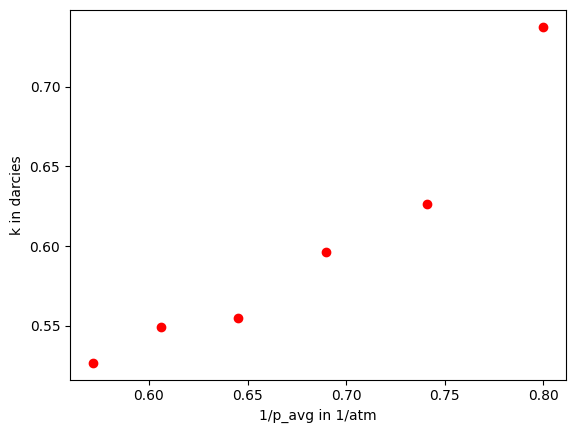

In [7]:
plt.xlabel('1/p_avg in 1/atm')
plt.ylabel('k in darcies')
plt.scatter(data[['1/p_avg']],data[['k']],marker='o',color='red')

Hence the klinkenberg factor b is [43.71466111] & absolute permeability k_abs is 19.608272441259732 millidarcies.


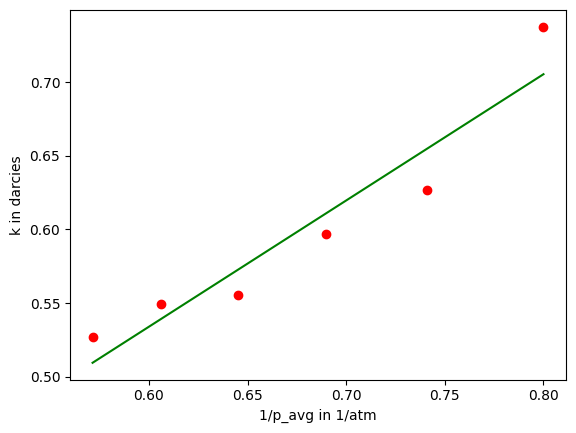

In [8]:
reg=linear_model.LinearRegression()
reg.fit(data[['1/p_avg']],data.k)

m=reg.coef_
c=reg.intercept_

print(f'Hence the klinkenberg factor b is {m/c} & absolute permeability k_abs is {c*1000} millidarcies.')

plt.xlabel('1/p_avg in 1/atm')
plt.ylabel('k in darcies')
plt.scatter(data[['1/p_avg']],data[['k']],marker='o',color='red')
plt.plot(data[['1/p_avg']],reg.predict(data[['1/p_avg']]),color='green')